In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
raw = pd.read_csv("/content/gdrive/MyDrive/BT5151/online_shoppers_intention.csv")

In [ ]:
raw

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### EDA

In [ ]:
total = raw.isnull().sum().sort_values(ascending = False)
percent = (raw.isnull().sum()/raw.isnull().count()*100).sort_values(ascending = False)
missing_raw_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_raw_data

,Total,Percent
Administrative,0,0.0
Administrative_Duration,0,0.0
Weekend,0,0.0
VisitorType,0,0.0
TrafficType,0,0.0
Region,0,0.0
Browser,0,0.0
OperatingSystems,0,0.0
Month,0,0.0
SpecialDay,0,0.0


Check whether target class is balanced by showing portion of each class
False    0.845255
True     0.154745
Name: Revenue, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


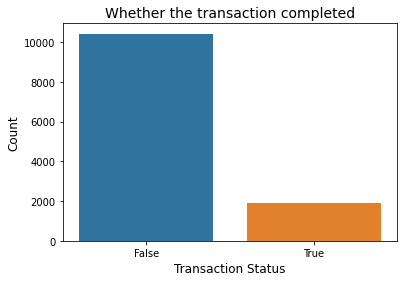

In [ ]:
print('Check whether target class is balanced by showing portion of each class')
print(raw['Revenue'].value_counts()/len(raw))

# Visualize the data
sns.countplot(raw['Revenue'])
plt.title('Whether the transaction completed', fontsize= 14)
plt.xlabel('Transaction Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

Percent share for each type:
Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


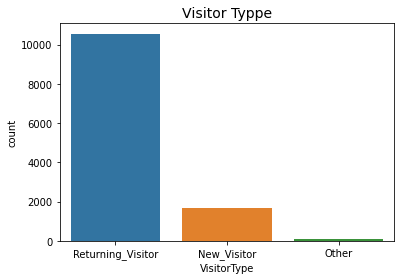

In [ ]:
print("Percent share for each type:")
print(raw['VisitorType'].value_counts(normalize=True))

sns.countplot(raw['VisitorType'])
plt.title('Visitor Typpe', fontsize= 14)
plt.show()

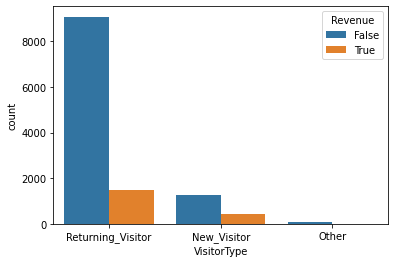

In [ ]:
sns.countplot(data=raw, x='VisitorType', hue='Revenue')

Percent share for each type:
False    0.767397
True     0.232603
Name: Weekend, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


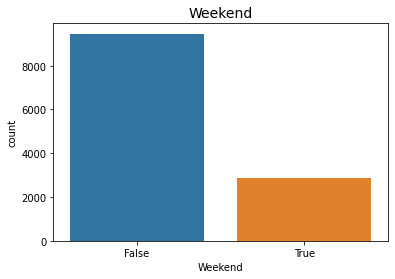

In [ ]:
print("Percent share for each type:")
print(raw['Weekend'].value_counts(normalize=True))

sns.countplot(raw['Weekend'])
plt.title('Weekend', fontsize= 14)
plt.show()

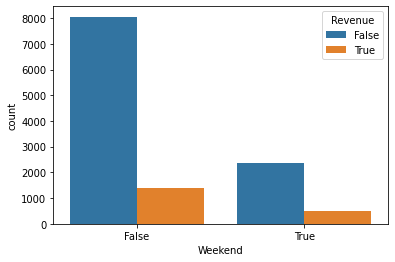

In [ ]:
sns.countplot(data=raw, x='Weekend', hue='Revenue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


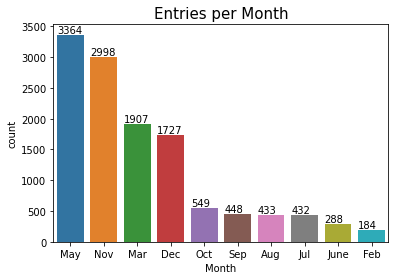

In [ ]:
month = raw['Month'].value_counts()

sns.countplot(raw['Month'], order=month.index)
plt.title('Entries per Month', fontsize=15)
xval = -0.4

for index, value in month.items():
    plt.text(x=xval, y=value+30, s=str(value))
    xval += 1
plt.show()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


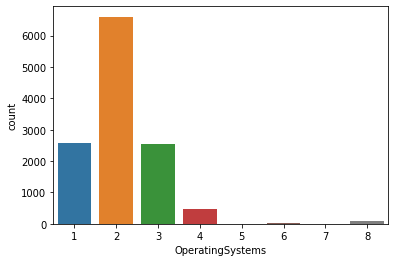

In [ ]:
print(raw['OperatingSystems'].value_counts())
ax = sns.countplot(x='OperatingSystems', data=raw)

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


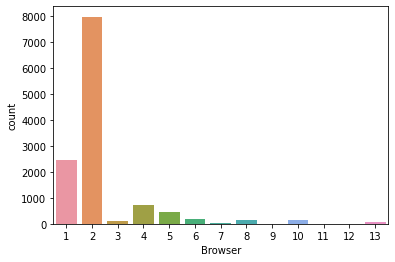

In [ ]:
print(raw['Browser'].value_counts())
ax = sns.countplot(x='Browser', data=raw)

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


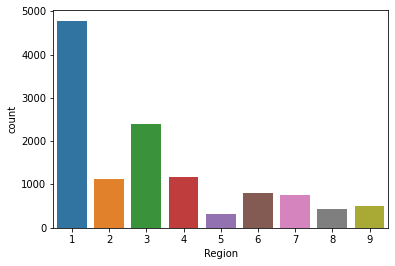

In [ ]:
print(raw['Region'].value_counts())
ax = sns.countplot(x='Region', data=raw)
# We decide not to use Region

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


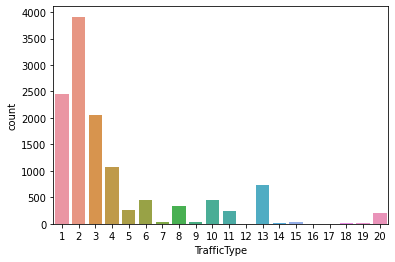

In [ ]:
print(raw['TrafficType'].value_counts())
ax = sns.countplot(x='TrafficType', data=raw)

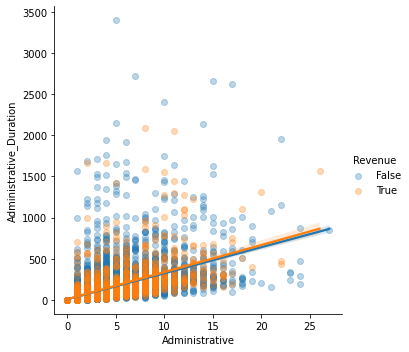

In [ ]:
sns.lmplot(x="Administrative", y="Administrative_Duration", data=raw, 
           scatter_kws={'alpha':0.3}, hue = 'Revenue')
plt.show()

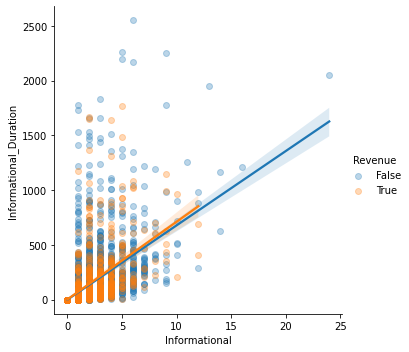

In [ ]:
sns.lmplot(x="Informational", y="Informational_Duration", data=raw, 
           scatter_kws={'alpha':0.3}, hue = 'Revenue')
plt.show()

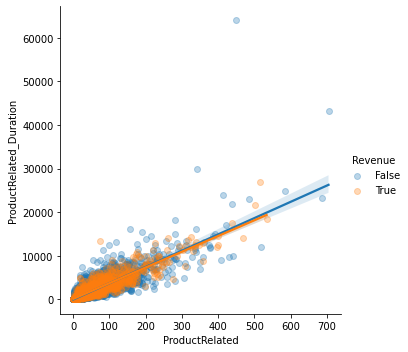

In [ ]:
sns.lmplot(x="ProductRelated", y="ProductRelated_Duration", data=raw, 
           scatter_kws={'alpha':0.3}, hue = 'Revenue')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
raw['Revenue']=lb.fit_transform(raw['Revenue'])
raw['Weekend']=lb.fit_transform(raw['Weekend'])
raw

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,0,0


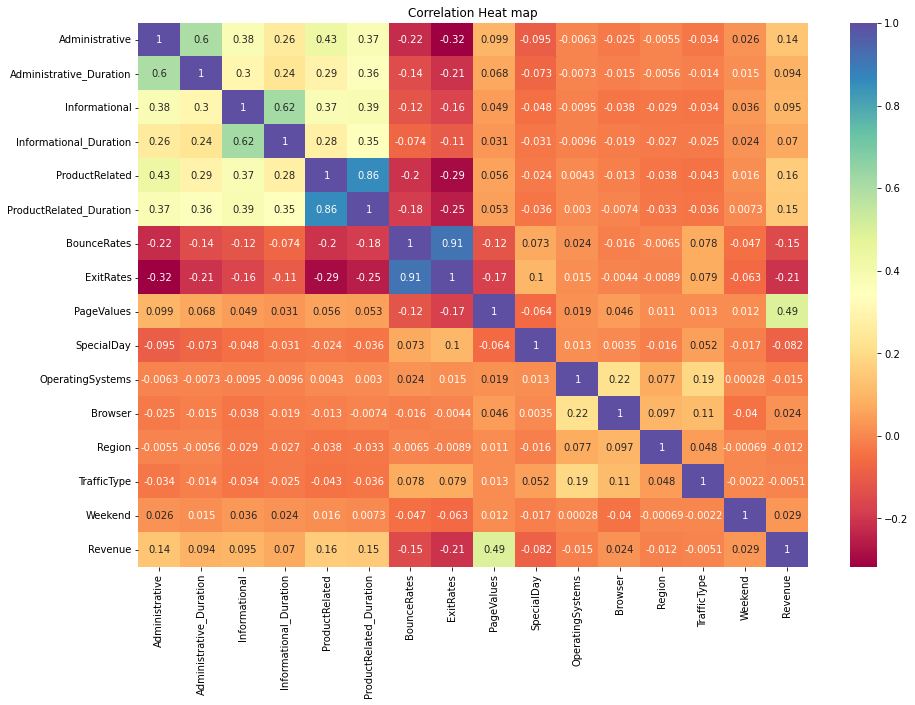

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(raw.corr(), annot=True, cmap='Spectral')
plt.title('Correlation Heat map')
plt.show()

### Data Preprocessing

Operating System: Group 5,6,7,8 into 4

In [ ]:
raw['OperatingSystems'] = raw['OperatingSystems'].replace([4,5,6,7,8],4)
raw['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     589
Name: OperatingSystems, dtype: int64

Browser: Group 3 (from 13 into Group 3)

In [ ]:
raw['Browser'] = raw['Browser'].replace([3,4,5,6,7,8,9,10,11,12,13],3)
raw['Browser'].value_counts()

2    7961
1    2462
3    1907
Name: Browser, dtype: int64

In [ ]:
raw['Avg_Administrative_Duration'] = np.where(raw.Administrative == 0, 0, raw.Administrative_Duration / raw.Administrative)
raw['Avg_Informational_Duration'] = np.where(raw.Informational == 0, 0, raw.Informational_Duration / raw.Informational)
raw['Avg_ProductRelated_Duration'] = np.where(raw.ProductRelated == 0, 0, raw.ProductRelated_Duration / raw.ProductRelated)
raw = raw.fillna(0)

In [ ]:
raw = raw.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration'],axis=1)

In [ ]:
raw2 = pd.get_dummies(raw, columns=['Month','OperatingSystems','Browser','VisitorType','Weekend'],
                   drop_first=True)

In [ ]:
raw2.columns

Index(['BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Region',
       'TrafficType', 'Revenue', 'Avg_Administrative_Duration',
       'Avg_Informational_Duration', 'Avg_ProductRelated_Duration',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'Browser_2', 'Browser_3', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_1'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
rf.fit(raw2.drop(['Revenue'],axis=1), raw2.Revenue)
features = raw2.drop(['Revenue'],axis=1).columns.values

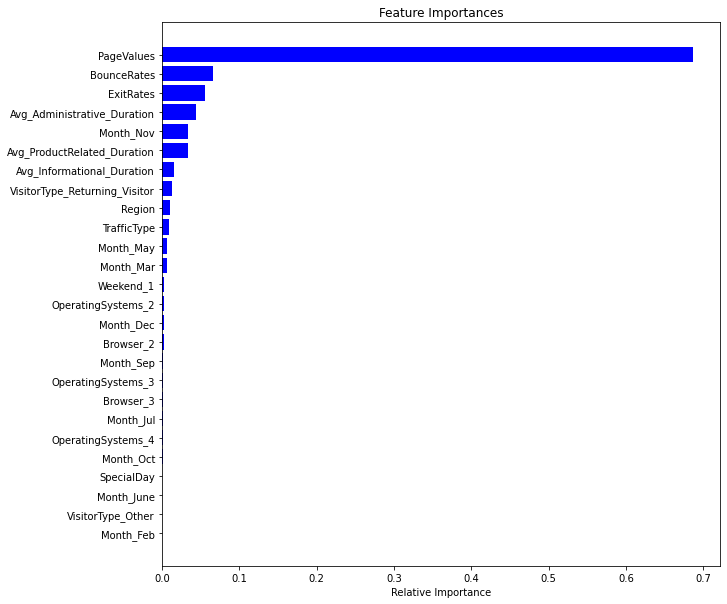

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
df = raw.copy()
df = df.drop(['Region','TrafficType'],axis=1)
df.head()

,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,VisitorType,Weekend,Revenue,Avg_Administrative_Duration,Avg_Informational_Duration,Avg_ProductRelated_Duration
0,0.20,0.20,0.0,0.0,Feb,1,1,Returning_Visitor,0,0,0.0,0.0,0.000000
1,0.00,0.10,0.0,0.0,Feb,2,2,Returning_Visitor,0,0,0.0,0.0,32.000000
2,0.20,0.20,0.0,0.0,Feb,4,1,Returning_Visitor,0,0,0.0,0.0,0.000000
3,0.05,0.14,0.0,0.0,Feb,3,2,Returning_Visitor,0,0,0.0,0.0,1.333333
4,0.02,0.05,0.0,0.0,Feb,3,3,Returning_Visitor,1,0,0.0,0.0,62.750000


In [ ]:
df = pd.get_dummies(df, columns=['Month','OperatingSystems','Browser','VisitorType','Weekend'],
                   drop_first=True)
df.head()

,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Avg_Administrative_Duration,Avg_Informational_Duration,Avg_ProductRelated_Duration,Month_Dec,Month_Feb,...,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,Browser_2,Browser_3,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_1
0,0.20,0.20,0.0,0.0,0,0.0,0.0,0.000000,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.00,0.10,0.0,0.0,0,0.0,0.0,32.000000,0,1,...,0,0,1,0,0,1,0,0,1,0
2,0.20,0.20,0.0,0.0,0,0.0,0.0,0.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0.05,0.14,0.0,0.0,0,0.0,0.0,1.333333,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0.02,0.05,0.0,0.0,0,0.0,0.0,62.750000,0,1,...,0,0,0,1,0,0,1,0,1,1


In [ ]:
X = df.drop(['Revenue'],axis=1)
y = df['Revenue']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X[['BounceRates','ExitRates','PageValues','Avg_Administrative_Duration','Avg_Informational_Duration','Avg_ProductRelated_Duration']] = scaler.fit_transform(X[['BounceRates','ExitRates','PageValues','Avg_Administrative_Duration','Avg_Informational_Duration','Avg_ProductRelated_Duration']])


In [ ]:
y.shape

(12330,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Check class imbalance in set
print('Train purchase class = {}'.format(sum(y_train == 1)))
print('Train non purchase class = {}'.format(len(y_train) - sum(y_train == 1)))
print('Test purchase class = {}'.format(sum(y_test == 1)))
print('Test non purchase class = {}'.format(len(y_test) - sum(y_test == 1)))

Train purchase class = 1336
Train non purchase class = 7295
Test purchase class = 572
Test non purchase class = 3127


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

#check class imbalance in set
print('Train purchase class = {}'.format(sum(y_train == 1)))
print('Train non purchase class = {}'.format(len(y_train) - sum(y_train == 1)))
print('Test purchase class = {}'.format(sum(y_test == 1)))
print('Test non purchase class = {}'.format(len(y_test) - sum(y_test == 1)))

Train purchase class = 7295
Train non purchase class = 7295
Test purchase class = 572
Test non purchase class = 3127


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Light GBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

params = {'max_depth': [1, 3, 6, 8, 10],
          'num_leaves':[30, 40, 50],
          'learning_rate': [0.01, 0.05, 0.1],
          'min_child_samples':[10, 15, 20]
          }


lightgbm = LGBMClassifier(objective = 'binary',
                    metric = 'binary_logloss,auc',
                    max_depth = 6,
                    num_leaves = 40,
                    learning_rate = 0.1,
                    min_child_samples=21,
                    min_child_weight=0.001)

grid = GridSearchCV(estimator=lightgbm, param_grid=params, scoring='roc_auc', cv=5, verbose=1)

grid_result = grid.fit(X_train, y_train)
print('best score: ', grid_result.best_score_)
print('best params: ', grid_result.best_params_)

lightgbm_y_pred = grid_result.predict(X_test)
print("AUC on training set: {:.3f}".format(grid_result.score(X_train, y_train)))
print("AUC on test set: {:.3f}".format(grid_result.score(X_test, y_test)))
print(classification_report(y_test, lightgbm_y_pred))

Fitting 5 folds for each of 135 candidates, totalling 675 fits
best score:  0.969239449217614
best params:  {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 10, 'num_leaves': 50}
AUC on training set: 0.994
AUC on test set: 0.918
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3127
           1       0.56      0.75      0.64       572

    accuracy                           0.87      3699
   macro avg       0.75      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699



In [ ]:
print('Training set vs Test set')
print('Accuracy score\n',accuracy_score(y_train,grid_result.predict(X_train)),'\t',
      accuracy_score(y_test,grid_result.predict(X_test)))
print('Precision score\n', precision_score(y_train,grid_result.predict(X_train)),'\t',
      precision_score(y_test,grid_result.predict(X_test)))
print('Recall score \n', recall_score(y_train,grid_result.predict(X_train)),'\t',
      recall_score(y_test,grid_result.predict(X_test)))
print('F1 score\n', f1_score(y_train,grid_result.predict(X_train)),'\t',f1_score(y_test,grid_result.predict(X_test)))
print('ROC-AUC score \n', roc_auc_score(y_train,grid_result.predict_proba(X_train)[:,1]),'\t',
      roc_auc_score(y_test,grid_result.predict_proba(X_test)[:,1]))

Training set vs Test set
Accuracy score
 0.9568197395476353 	 0.8696945120302785
Precision score
 0.9465362454776899 	 0.5587467362924282
Recall score 
 0.9683344756682659 	 0.7482517482517482
F1 score
 0.9573112887925191 	 0.6397608370702541
ROC-AUC score 
 0.9937705461738984 	 0.9180921413092824


## XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

params = {'max_depth':[24, 26, 28, 30],
      'n_estimators':[100, 150, 200, 250],
      'learning_rate':[0.001, 0.01, 0.1],
      'min_child_weight':[0.5, 1, 2]
      }

xgboost = XGBClassifier(objective='binary:logistic', eval_metric="auc", n_jobs=-1 ,random_state=42)
grid = GridSearchCV(estimator=xgboost, param_grid=params, scoring='roc_auc', cv=5, verbose=1)

grid_result = grid.fit(X_train, y_train)
print('best score: ', grid_result.best_score_)
print('best params: ', grid_result.best_params_)

xgboost_y_pred = grid_result.predict(X_test)
print("AUC on training set: {:.3f}".format(grid_result.score(X_train, y_train)))
print("AUC on test set: {:.3f}".format(grid_result.score(X_test, y_test)))
print(classification_report(y_test, xgboost_y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
best score:  0.9748343222868998
best params:  {'learning_rate': 0.1, 'max_depth': 30, 'min_child_weight': 0.5, 'n_estimators': 250}
AUC on training set: 1.000
AUC on test set: 0.915
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3127
           1       0.57      0.72      0.64       572

    accuracy                           0.87      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699



In [ ]:
print('Training set vs Test set')
print('Accuracy score\n',accuracy_score(y_train,grid_result.predict(X_train)),'\t',
      accuracy_score(y_test,grid_result.predict(X_test)))
print('Precision score\n', precision_score(y_train,grid_result.predict(X_train)),'\t',
      precision_score(y_test,grid_result.predict(X_test)))
print('Recall score \n', recall_score(y_train,grid_result.predict(X_train)),'\t',
      recall_score(y_test,grid_result.predict(X_test)))
print('F1 score\n', f1_score(y_train,grid_result.predict(X_train)),'\t',f1_score(y_test,grid_result.predict(X_test)))
print('ROC-AUC score \n', roc_auc_score(y_train,grid_result.predict_proba(X_train)[:,1]),'\t',
      roc_auc_score(y_test,grid_result.predict_proba(X_test)[:,1]))

Training set vs Test set
Accuracy score
 0.9999314599040439 	 0.8740200054068668
Precision score
 1.0 	 0.5734072022160664
Recall score 
 0.9998629198080877 	 0.7237762237762237
F1 score
 0.9999314552059771 	 0.6398763523956722
ROC-AUC score 
 0.9999965142733929 	 0.9148927902925345


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


params = {'max_depth': [24, 26, 28, 30, 32],
      'n_estimators':[100, 200, 250, 300, 350],
      'max_samples':[0.1, 0.5, 0.9]
      }


clf = RandomForestClassifier(
    n_estimators=200,
    max_features='auto',
    criterion='entropy', 
    bootstrap=True, 
    max_samples=0.9, 
    max_depth=30, 
    n_jobs=-1, 
    random_state=42,     
)

grid = GridSearchCV(estimator=clf, param_grid=params, scoring='roc_auc', cv=5, verbose=1)

grid_result = grid.fit(X_train, y_train)
print('best score: ', grid_result.best_score_)
print('best params: ', grid_result.best_params_)

random_forest_y_pred = grid_result.predict(X_test)
print("AUC on training set: {:.3f}".format(grid_result.score(X_train, y_train)))
print("AUC on test set: {:.3f}".format(grid_result.score(X_test, y_test)))
print(classification_report(y_test, random_forest_y_pred))

Fitting 5 folds for each of 75 candidates, totalling 375 fits
best score:  0.9783937095318649
best params:  {'max_depth': 32, 'max_samples': 0.9, 'n_estimators': 250}
AUC on training set: 1.000
AUC on test set: 0.916
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3127
           1       0.56      0.75      0.64       572

    accuracy                           0.87      3699
   macro avg       0.75      0.82      0.78      3699
weighted avg       0.89      0.87      0.88      3699



In [ ]:
print('Training set vs Test set')
print('Accuracy score\n',accuracy_score(y_train,grid_result.predict(X_train)),'\t',
      accuracy_score(y_test,grid_result.predict(X_test)))
print('Precision score\n', precision_score(y_train,grid_result.predict(X_train)),'\t',
      precision_score(y_test,grid_result.predict(X_test)))
print('Recall score \n', recall_score(y_train,grid_result.predict(X_train)),'\t',
      recall_score(y_test,grid_result.predict(X_test)))
print('F1 score\n', f1_score(y_train,grid_result.predict(X_train)),'\t',f1_score(y_test,grid_result.predict(X_test)))
print('ROC-AUC score \n', roc_auc_score(y_train,grid_result.predict_proba(X_train)[:,1]),'\t',
      roc_auc_score(y_test,grid_result.predict_proba(X_test)[:,1]))

Training set vs Test set
Accuracy score
 0.9999314599040439 	 0.8688834820221681
Precision score
 1.0 	 0.5565669700910273
Recall score 
 0.9998629198080877 	 0.7482517482517482
F1 score
 0.9999314552059771 	 0.6383296047725577
ROC-AUC score 
 0.9999574478280212 	 0.9161099134316276


## Final LightGBM and plot feature importance

In [ ]:
lightgbm_final = LGBMClassifier(objective = 'binary',
                    metric = 'binary_logloss,auc',
                    max_depth = 10,
                    num_leaves = 50,
                    learning_rate = 0.1,
                    min_child_samples = 10,
                    min_child_weight = 0.001)

lightgbm_final.fit(X_train, y_train)

LGBMClassifier(max_depth=10, metric='binary_logloss,auc', min_child_samples=10,
               num_leaves=50, objective='binary')

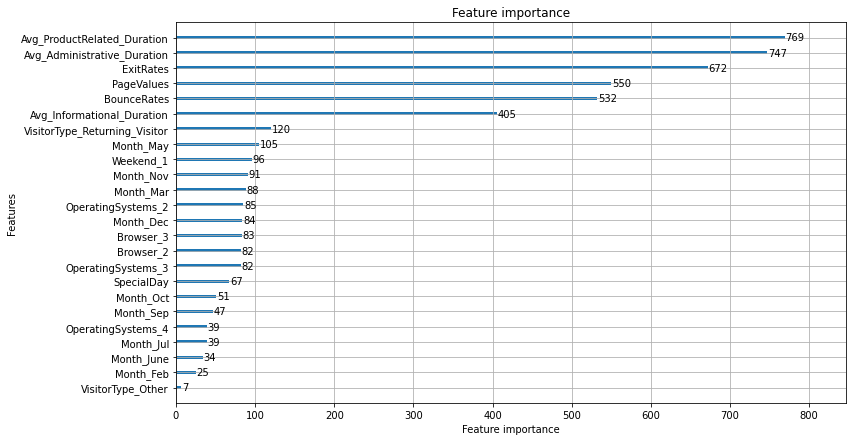

In [ ]:
import lightgbm

lightgbm.plot_importance(lightgbm_final, figsize=(12, 7))
plt.show()